In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, sigmax, sigmay, sigmaz, mesolve, Bloch

### Déterminer la période des oscillations de Rabi avec un graphique Chevron en fonction du detuning $\Delta = \omega_{qubit}-\omega_{drive}$

In [2]:
##------Définition de la fonction du Chevron plot en fonction du detuning------##
def detuning_chevron(detuning) :

    # Parameters
    time_list = np.linspace(0, 20, 2001)  # [2pi/g] time points normalized by coupling
    g = 1  # normalized coupling
    delta_list = np.linspace(-detuning, detuning, 121)  # detuning (normalized by coupling g)
    
    # Initialize an empty list to store the data
    data = []
    
    # Loop over detuning values (delta)
    for delta in delta_list:
        # Initial state: ground state of the 2-level system
        psi0 = basis(2, 0)
    
        # Define the rotating-frame Hamiltonian
        H = -delta/2 * sigmaz() - g/2 * sigmax()
    
        # Solve the Schrodinger equation and obtain the expectation value of sigma_z
        result = mesolve(H=H, rho0=psi0, tlist=time_list, e_ops=[sigmaz()])
    
        # Append the expectation values to the data list
        data.append(result.expect[0])
    
    # Convert the data list into a 2D NumPy array
    data = np.array(data)
    
    # Create the 2D color plot
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(time_list, delta_list, data, shading='auto', cmap='viridis')
    plt.colorbar(label=r'$\langle \sigma_z \rangle$')
    
    # Labels and title
    plt.xlabel(r'Time [$2\pi/g$]')
    plt.ylabel(r'Frequency detuning $\Delta$ [g]')
    plt.title(r'Chevron plot')
    
    # Show the plot
    plt.show()

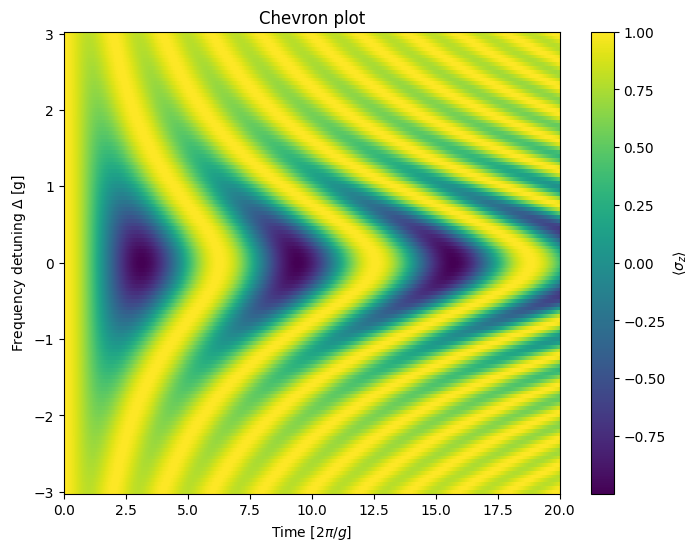

In [3]:
##------Appel de la fonction, paramètres : detuning------##
detuning_chevron(3)